In [2]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense



# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import tensorflow_probability as tfp

tfd = tfp.distributions
tfpl = tfp.layers
import random as rn
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

Pleas download the dataset from https://www.kaggle.com/datasets/alxmamaev/flowers-recognition and replace the directory hereunder with the directory where you saved/downloaded your data

In [83]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='C:/Users/Alanh/Downloads/dataset/flowers/daisy'

FLOWER_SUNFLOWER_DIR='C:/Users/Alanh/Downloads/dataset/flowers/sunflower'
FLOWER_TULIP_DIR='C:/Users/Alanh/Downloads/dataset/flowers/tulip'
FLOWER_DANDI_DIR='C:/Users/Alanh/Downloads/dataset/flowers/dandelion'
FLOWER_ROSE_DIR='C:/Users/Alanh/Downloads/dataset/flowers/rose'

In [84]:
def assign_label(img,flower_type):
    return flower_type

In [85]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [86]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 764/764 [00:02<00:00, 367.06it/s]

764


In [87]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 733/733 [00:01<00:00, 488.91it/s]

1497


In [88]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 984/984 [00:01<00:00, 545.95it/s]

2481


In [89]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|█████████████████████████████████████████████████████████████████████████████| 1052/1052 [00:01<00:00, 560.43it/s]

3533


In [90]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 784/784 [00:01<00:00, 589.03it/s]

4317


In [91]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [92]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [12]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [19]:
batch_size=128
epochs=150

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

Also here replace the directory to the directory where the dataset is saved. Flowers_splitted is a folder that will be created in your directory

In [25]:
import os
import splitfolders 

input_dir = os.path.join('C:/Users/Alanh/Downloads/dataset/flowers/')
output_dir = os.path.join('C:/Users/Alanh/Downloads/dataset/flowers_splitted/')

splitfolders.ratio(input_dir, output=output_dir, seed=1337, ratio=(.8, .2), group_prefix=None)

Copying files: 4317 files [00:08, 484.58 files/s]


flowers_splitted/train/ will be created in your dirctory. you only need to change "C:/Users/Alanh/Downloads/dataset/" to yoour directory

In [29]:
train_dir = os.path.join('C:/Users/Alanh/Downloads/dataset/flowers_splitted/train/')
test_dir = os.path.join('C:/Users/Alanh/Downloads/dataset/flowers_splitted/val/')

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def image_generator(train_parent_directory, test_parent_directory):
    
    train_datagen = ImageDataGenerator(rescale=1/255)
    test_datagen = ImageDataGenerator(rescale=1/255)
    
    train_generator = train_datagen.flow_from_directory(train_parent_directory,
                                  target_size = (150,150),
                                  batch_size = 256,
                                  class_mode = 'categorical',
                                  subset='training')
 
    
    test_generator = test_datagen.flow_from_directory(test_parent_directory,
                                 target_size=(150,150),
                                 batch_size = 256,
                                 class_mode = 'categorical')    
    
    return train_generator, test_generator

In [42]:
train_generator, test_generator = image_generator(train_dir, test_dir)

Found 3452 images belonging to 5 classes.
Found 865 images belonging to 5 classes.


In [43]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_probability as tfp

In [61]:

divergence_fn = lambda q,p,_:tfd.kl_divergence(q,p)/3457

model_bayes = Sequential([
    
    tfpl.Convolution2DReparameterization(input_shape=(150,150,3), filters=8, kernel_size=16, activation='relu',
                                           kernel_prior_fn = tfpl.default_multivariate_normal_fn,
                                           kernel_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                           kernel_divergence_fn = divergence_fn,
                                           bias_prior_fn = tfpl.default_multivariate_normal_fn,
                                           bias_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                           bias_divergence_fn = divergence_fn),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    tfpl.DenseReparameterization(units=tfpl.OneHotCategorical.params_size(5), activation=None,
                                    kernel_prior_fn = tfpl.default_multivariate_normal_fn,
                                    kernel_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                    kernel_divergence_fn = divergence_fn,
                                    bias_prior_fn = tfpl.default_multivariate_normal_fn,
                                    bias_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                    bias_divergence_fn = divergence_fn
                                ),
    tfpl.OneHotCategorical(5)
    
])
model_bayes.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_reparameterization_2  (None, 135, 135, 8)      12304     
  (Conv2DReparameterization)                                     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 67, 67, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 65, 65, 32)        2336      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 30, 30, 64)        18496     
                                                      

In [64]:
from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [65]:
from tensorflow.keras.optimizers import Adam

def negative_log_likelihood(y_true, y_pred):
    return -y_pred.log_prob(y_true)

model_bayes.compile(loss = negative_log_likelihood,
              optimizer = Adam(learning_rate=0.001),
              metrics = ['accuracy'],
              experimental_run_tf_function = False)

In [67]:
history_bayes = model_bayes.fit(
      train_generator,
      epochs=170,
      verbose=1,validation_data = test_generator)

Epoch 1/170
14/14 [==============================] - 117s 8s/step - loss: 7.8384 - accuracy: 0.2141 - val_loss: 7.7803 - val_accuracy: 0.2266
Epoch 2/170
14/14 [==============================] - 118s 8s/step - loss: 7.7198 - accuracy: 0.2706 - val_loss: 7.6912 - val_accuracy: 0.2543
Epoch 3/170
14/14 [==============================] - 122s 9s/step - loss: 7.6548 - accuracy: 0.2706 - val_loss: 7.6657 - val_accuracy: 0.2971
Epoch 4/170
14/14 [==============================] - 117s 8s/step - loss: 7.6505 - accuracy: 0.3039 - val_loss: 7.6621 - val_accuracy: 0.2763
Epoch 5/170
14/14 [==============================] - 118s 8s/step - loss: 7.6578 - accuracy: 0.2697 - val_loss: 7.5513 - val_accuracy: 0.2694
Epoch 6/170
14/14 [==============================] - 116s 8s/step - loss: 7.5653 - accuracy: 0.2781 - val_loss: 7.5940 - val_accuracy: 0.3168
Epoch 7/170
14/14 [==============================] - 118s 8s/step - loss: 7.4605 - accuracy: 0.3404 - val_loss: 7.7399 - val_accuracy: 0.3006
Epoch 

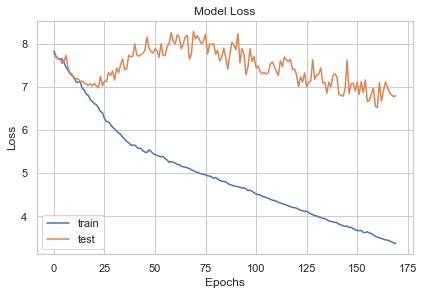

In [69]:
plt.plot(history_bayes.history['loss'])
plt.plot(history_bayes.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

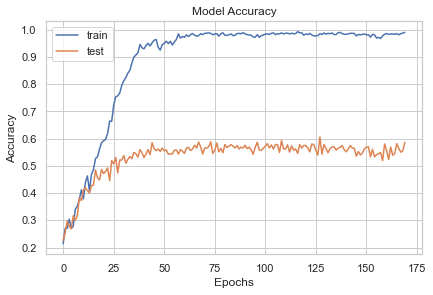

In [70]:
plt.plot(history_bayes.history['accuracy'])
plt.plot(history_bayes.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [102]:
Predictions= model_bayes.predict(x_test)
Predictions_digits=np.argmax(Predictions,axis=1)

In [103]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap="Greens")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

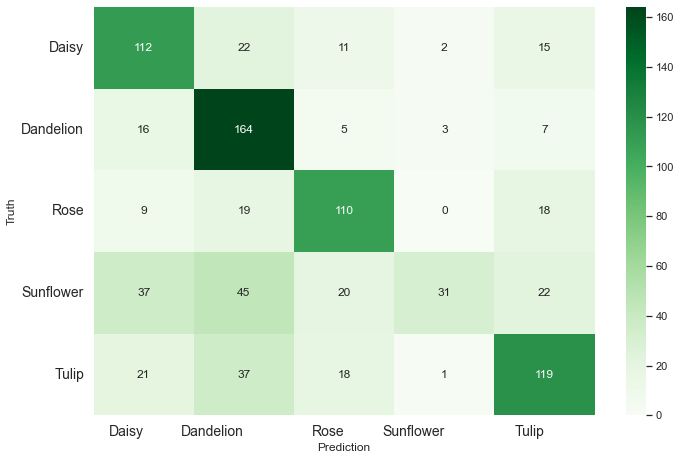

In [104]:
obtained = []
truth = []
classes = ['daisy','dandelion','rose','sunflower','tulip']

for i in range(len(Predictions-2)) : 
    obtained.append(classes[np.argmax(Predictions[i])])
    if y_test[i][0]==1:
        truth.append(classes[0])
    elif y_test[i][1]==1:
        truth.append(classes[1])
    elif y_test[i][2]==1:
        truth.append(classes[2])
    elif y_test[i][3]==1:
        truth.append(classes[3])
    elif y_test[i][4]==1:
        truth.append(classes[4])

cm = confusion_matrix(truth,obtained)
print_confusion_matrix(cm,['Daisy','Dandelion','Rose','Sunflower','Tulip'])

In [126]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("Recall : " + str(TPR))
#print("Overall Reacll : " + str(np.sum(TPR)))
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision: " + str(PPV))
#print("Overall Precision : " + str(np.sum(PPV)))
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Positive likelihood ratio
LR = TPR/FPR
F1 = 2*(TPR*PPV)/(PPV+TPR)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy", ACC)
#print("Overall Accuracy: " + str(np.sum(ACC)))
print("F!", F1)

Recall : [0.69135802 0.84102564 0.70512821 0.2        0.60714286]
Precision: [0.57435897 0.57142857 0.67073171 0.83783784 0.65745856]
Accuracy [0.84606481 0.82175926 0.88425926 0.84953704 0.83912037]
F! [0.62745098 0.68049793 0.6875     0.32291667 0.63129973]


In [109]:
def import_and_predict_bayes(image, true_label):

    #read image
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    
    #show the image
    plt.imshow(img)
    plt.axis('off')
    
    img_resize = (cv2.resize(img, dsize=(150, 150), interpolation=cv2.INTER_CUBIC))/255.
    
    predicted_probabilities = np.empty(shape=(300, 5))
    
    for i in range(300):
        
        predicted_probabilities[i] = model_bayes(img_resize[np.newaxis,...]).mean().numpy()[0]
        
    pct_2p5 = np.array([np.percentile(predicted_probabilities[:, i], 2.5) for i in range(5)])
    pct_97p5 = np.array([np.percentile(predicted_probabilities[:, i], 97.5) for i in range(5)])
    
    fig, ax = plt.subplots(figsize=(12, 6))
    bar = ax.bar(np.arange(5), pct_97p5, color='red')
    bar[true_label].set_color('green')
    bar = ax.bar(np.arange(5), pct_2p5-0.02, color='white')
    ax.set_xticklabels([''] + [x for x in label])
    ax.set_ylim([0, 1])
    ax.set_ylabel('Probability')
    plt.show()

To make predictions for other images, select one from your directory and place its name here.

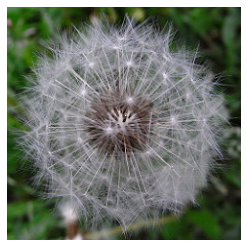

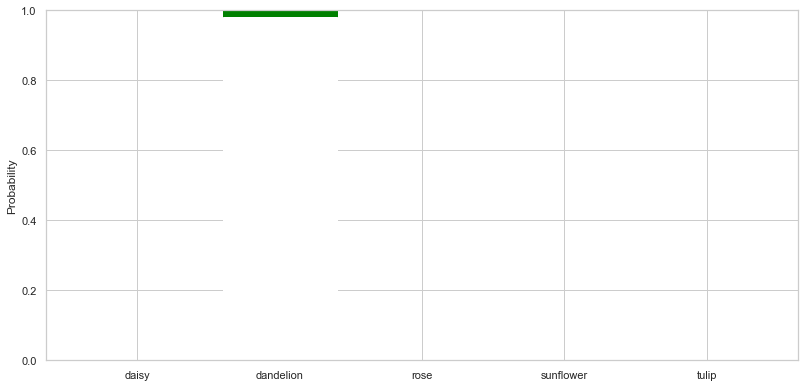

In [125]:
label = os.listdir(test_dir)
image1_dir = os.path.join(test_dir+'dandelion/3696596109_4c4419128a_m.jpg')
image2_dir = os.path.join(test_dir+'rose/1757822526_fe30b9b3ca_m.jpg')
image3_dir = os.path.join('C:/Users/Alanh/OneDrive/Documenten/ML_project/ConfusMatrix.png')
image4_dir = os.path.join(test_dir+'tulip/7166574936_3d93a510c5_n.jpg')


prediction = import_and_predict_bayes(image1_dir, label.index('dandelion'))

In [127]:
def get_model_memory_usage(batch_size, model):
    import numpy as np
    try:
        from keras import backend as K
    except:
        from tensorflow.keras import backend as K

    shapes_mem_count = 0
    internal_model_mem_count = 0
    for l in model.layers:
        layer_type = l.__class__.__name__
        if layer_type == 'Model':
            internal_model_mem_count += get_model_memory_usage(batch_size, l)
        single_layer_mem = 1
        out_shape = l.output_shape
        if type(out_shape) is list:
            out_shape = out_shape[0]
        for s in out_shape:
            if s is None:
                continue
            single_layer_mem *= s
        shapes_mem_count += single_layer_mem

    trainable_count = np.sum([K.count_params(p) for p in model.trainable_weights])
    non_trainable_count = np.sum([K.count_params(p) for p in model.non_trainable_weights])

    number_size = 4.0
    if K.floatx() == 'float16':
        number_size = 2.0
    if K.floatx() == 'float64':
        number_size = 8.0

    total_memory = number_size * (batch_size * shapes_mem_count + trainable_count + non_trainable_count)
    gbytes = np.round(total_memory / (1024.0 ** 3), 3) + internal_model_mem_count
    return gbytes

In [ ]:
get_model_memory_usage(256, model_bayes)